In [1]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter
from collections import OrderedDict
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150704.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.9M    0 23.9M    0     0  1351k      0 --:--:--  0:00:18 --:--:-- 1534k


In [3]:
with open('turnstile_150704.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [4]:
#Challenge 1
raw_readings = {}
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

In [31]:
#Challenge 2
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(out_cumulative))
                                   for _, _, date, time,
                                       _, _, out_cumulative in rows]
                       for turnstile, rows in raw_readings.items()}

for rows in datetime_cumulative.values():
    assert rows == sorted(rows)
    
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

all_counts = [count for rows in datetime_count_times.values() for _, count, _ in rows]
all_counts.sort()


all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times.values()
             for _, _, duration in rows]
#print Counter(all_times).most_common(10)

datetime_counts = {turnstile: [(time, count)
                               for (time, count, _) in rows
                               if 0 <= count <= 5000]
                   for turnstile, rows in datetime_count_times.items()}
print datetime_counts.items()[0]
all_good_counts = [count for rows in datetime_counts.values() for _, count in rows]
print len(all_good_counts) / len(all_counts)

all_good_counts.sort()
#print all_good_counts[-5:]

#print all_good_counts[:5]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'), [(datetime.datetime(2015, 6, 27, 0, 0), 17), (datetime.datetime(2015, 6, 27, 4, 0), 28), (datetime.datetime(2015, 6, 27, 8, 0), 149), (datetime.datetime(2015, 6, 27, 12, 0), 273), (datetime.datetime(2015, 6, 27, 16, 0), 257), (datetime.datetime(2015, 6, 27, 20, 0), 68), (datetime.datetime(2015, 6, 28, 0, 0), 12), (datetime.datetime(2015, 6, 28, 4, 0), 14), (datetime.datetime(2015, 6, 28, 8, 0), 139), (datetime.datetime(2015, 6, 28, 12, 0), 317), (datetime.datetime(2015, 6, 28, 16, 0), 152), (datetime.datetime(2015, 6, 28, 20, 0), 63), (datetime.datetime(2015, 6, 29, 0, 0), 4), (datetime.datetime(2015, 6, 29, 4, 0), 68), (datetime.datetime(2015, 6, 29, 8, 0), 336), (datetime.datetime(2015, 6, 29, 12, 0), 266), (datetime.datetime(2015, 6, 29, 16, 0), 261), (datetime.datetime(2015, 6, 29, 20, 0), 58), (datetime.datetime(2015, 6, 30, 0, 0), 5), (datetime.datetime(2015, 6, 30, 4, 0), 55), (datetime.datetime(2015, 6, 30, 8, 0), 347), (datetime.da

In [19]:
#Challenge 3
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

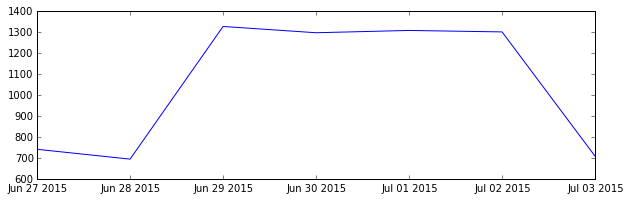

In [20]:
#Challenge 4
for turnstile, values in day_counts.items():
    dates = [date for date, count in values]
    counts = [count for date, count in values]
plt.figure(figsize = (10,3))
plt.plot(dates, counts)

In [21]:
#Challenge 5
#(By CA/Unit/Station)
group_all_counts = {}
keymap = {turnstile: tuple((turnstile[0], turnstile[1], turnstile[3])) for turnstile, rows in day_counts.items()}
for turnstile, rows in day_counts.items():
    group_all_counts.setdefault(tuple(keymap[turnstile]), []).append(tuple(rows))

#print station_day_counts.items()[0]

group_day_counts = {}
for station, data in group_all_counts.items():
    new_dict = {}
    for week in data:
            for day, count in week:
                new_dict[day] = new_dict.get(day, 0) + count
            group_day_counts[station] = sorted(new_dict.items())
print group_day_counts.items()[0]

#(by just the station name)

station_all_counts = {}
station_keymap = {turnstile: turnstile[2] for turnstile, rows in group_day_counts.items()}
for turnstile, rows in group_day_counts.items():
    station_all_counts.setdefault(station_keymap[turnstile], []).append(tuple(rows))

station_day_counts = {}
for station, data in station_all_counts.items():
    station_new_dict = {}
    for week in data:
            for day, count in week:
                station_new_dict[day] = station_new_dict.get(day, 0) + count
            station_day_counts[station] = sorted(station_new_dict.items())
print station_day_counts.items()[0]


(('N325A', 'R218', 'ELMHURST AVE'), [(datetime.date(2015, 6, 27), 3267), (datetime.date(2015, 6, 28), 2578), (datetime.date(2015, 6, 29), 3473), (datetime.date(2015, 6, 30), 3392), (datetime.date(2015, 7, 1), 3400), (datetime.date(2015, 7, 2), 3981), (datetime.date(2015, 7, 3), 2121)])
('BOYD-88 ST', [(datetime.date(2015, 6, 27), 666), (datetime.date(2015, 6, 28), 541), (datetime.date(2015, 6, 29), 1209), (datetime.date(2015, 6, 30), 1266), (datetime.date(2015, 7, 1), 1240), (datetime.date(2015, 7, 2), 1183), (datetime.date(2015, 7, 3), 642)])


In [22]:
#Challenge 6
for station, total_counts in station_day_counts.items():
    station_dates = [date for date, count in total_counts]
    station_counts = [count for date, count in total_counts]

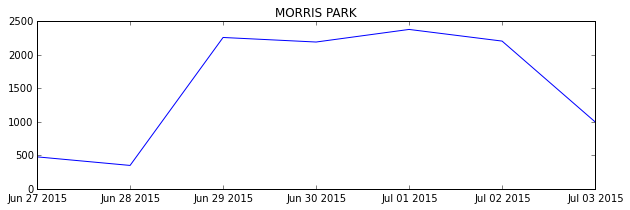

In [23]:
#Challenge 7
plt.figure(figsize = (10,3))
plt.title(station)
plt.plot(station_dates, station_counts)

In [24]:
#Challenge 9
total_ridership_counts = {}
for station, date_counts in station_day_counts.items():
    for day, count in date_counts:
        total_ridership_counts[station] = total_ridership_counts.get(station, 0) + count

print sorted(total_ridership_counts.items(), key=lambda tup: tup[-1], reverse = True)


[('34 ST-PENN STA', 916241), ('42 ST-GRD CNTRL', 793364), ('34 ST-HERALD SQ', 640897), ('14 ST-UNION SQ', 589796), ('42 ST-TIMES SQ', 576552), ('86 ST', 513171), ('42 ST-PA BUS TE', 484667), ('125 ST', 375580), ('FULTON ST', 367106), ('CANAL ST', 359958), ('59 ST', 320664), ('59 ST-COLUMBUS', 318233), ('47-50 ST-ROCK', 302377), ('MAIN ST', 298404), ('23 ST', 286386), ('96 ST', 279770), ('W 4 ST-WASH SQ', 261759), ('PATH WTC', 256271), ('CHAMBERS ST', 250695), ('72 ST', 248997), ('50 ST', 243370), ('LEXINGTON-53 ST', 242307), ('ROOSEVELT AVE', 237963), ('BARCLAYS CENTER', 235714), ('WALL ST', 208598), ('42 ST-BRYANT PK', 206790), ('77 ST', 197577), ('BEDFORD AVE', 194932), ('8 AVE', 188797), ('14 ST', 187476), ('JAMAICA CENTER', 186857), ('28 ST', 184930), ('145 ST', 179425), ('BROADWAY/LAFAY', 175298), ('BOWLING GREEN', 164130), ('CHURCH AVE', 156427), ('1 AVE', 147912), ('UNION TPK-KEW G', 147219), ('5 AVE-53 ST', 146789), ('33 ST', 136774), ('BOROUGH HALL/CT', 135628), ('SUTPHIN BLVD

In [25]:
top_stations = OrderedDict(sorted(total_ridership_counts.items(), key=lambda tup: tup[-1], reverse = True)[0:10])
print top_stations

OrderedDict([('34 ST-PENN STA', 916241), ('42 ST-GRD CNTRL', 793364), ('34 ST-HERALD SQ', 640897), ('14 ST-UNION SQ', 589796), ('42 ST-TIMES SQ', 576552), ('86 ST', 513171), ('42 ST-PA BUS TE', 484667), ('125 ST', 375580), ('FULTON ST', 367106), ('CANAL ST', 359958)])


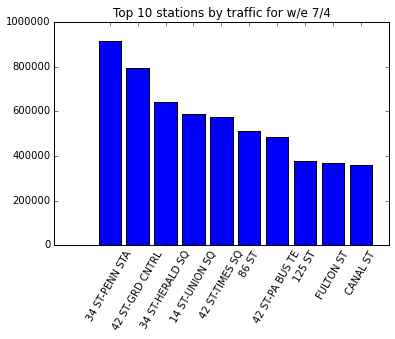

In [34]:
plt.bar(range(len(top_stations)), top_stations.values(), align='center')
plt.title("Top 10 stations by traffic for w/e 7/4")
plt.xticks(range(len(top_stations)), top_stations.keys(), rotation=60)


plt.show()


In [27]:
time_top_stations = OrderedDict(sorted(station_day_counts.items(), key=lambda tup: tup[-1], reverse = True)[0:10])

total_day_counts = {}
for station, day_counts in time_top_stations.items():
    for day, count in day_counts:
        total_day_counts[day] = total_day_counts.get(day, 0) + count
total_counts = OrderedDict(sorted(total_day_counts.items(), key=lambda tup: tup[0]))

print total_counts


OrderedDict([(datetime.date(2015, 6, 27), 608523), (datetime.date(2015, 6, 28), 545929), (datetime.date(2015, 6, 29), 935426), (datetime.date(2015, 6, 30), 968972), (datetime.date(2015, 7, 1), 967860), (datetime.date(2015, 7, 2), 958081), (datetime.date(2015, 7, 3), 563839)])


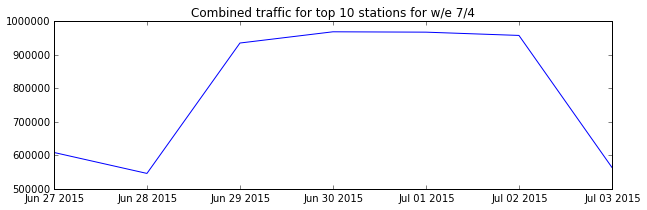

In [28]:
plt.figure(figsize = (10,3))
plt.title("Combined traffic for top 10 stations for w/e 7/4")
plt.plot(total_counts.keys(), total_counts.values())

In [29]:
time_station_all_counts = {}
time_station_keymap = {turnstile: turnstile[3] for turnstile, rows in datetime_counts.items()}
for turnstile, rows in datetime_counts.items():
    time_station_all_counts.setdefault(time_station_keymap[turnstile], []).append(tuple(rows))

time_station_day_counts = {}
for station, data in time_station_all_counts.items():
    station_new_dict = {}
    for week in data:
            for day, count in week:
                station_new_dict[day] = station_new_dict.get(day, 0) + count
            time_station_day_counts[station] = sorted(station_new_dict.items())
penn_time =  time_station_day_counts["34 ST-PENN STA"]

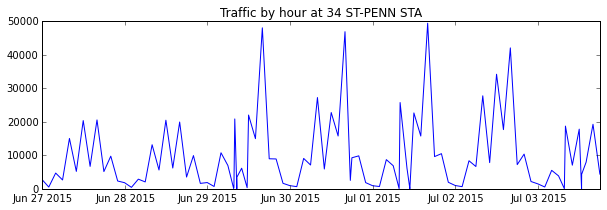

In [30]:

plt.figure(figsize = (10,3))
plt.title("Traffic by hour at 34 ST-PENN STA")
plt.plot([time for time, count in penn_time], [count for time, count in penn_time])
